In [8]:
import zipfile
from pathlib import Path

# Pfad zur ZIP-Datei
zip_path = Path("/workspace/Projekt/Data.zip")

# Zielordner für die entpackten Dateien
extract_path = Path("/workspace/Projekt/Testdaten")

# Entpacken
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("ZIP entpackt nach:", extract_path)

ZIP entpackt nach: /workspace/Projekt/Testdaten


In [13]:
from pathlib import Path

root = Path("/workspace/Projekt")
print(list(root.iterdir()))

[PosixPath('/workspace/Projekt/.ipynb_checkpoints'), PosixPath('/workspace/Projekt/Data.zip'), PosixPath('/workspace/Projekt/Testdaten'), PosixPath('/workspace/Projekt/01_data_preparation.ipynb')]


In [17]:
from pathlib import Path

data_root = Path("/workspace/Projekt/Testdaten/Data/SAP Bilder sortiert")

print("Gefundene Klassenordner:")
counts = {}
for cls in data_root.iterdir():
    if cls.is_dir():
        n = len(list(cls.glob("*.*")))
        counts[cls.name] = n
        print("-", cls.name, ":", n, "Bilder")

Gefundene Klassenordner:
- ABAP Dictionary : 33 Bilder
- Composite Provider : 17 Bilder
- Datenvorschau : 41 Bilder
- Transformationen : 39 Bilder
- Excel : 132 Bilder
- Bewegungsdaten : 10 Bilder
- Data Flow Object : 44 Bilder
- BW4Cockpit (Stammdaten) : 38 Bilder
- Data Source : 28 Bilder
- Query : 72 Bilder
- Data Store Object : 8 Bilder
- DTP : 42 Bilder
- Data Mart : 12 Bilder


/tmp/ipykernel_14050/167304169.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="Blues_d")


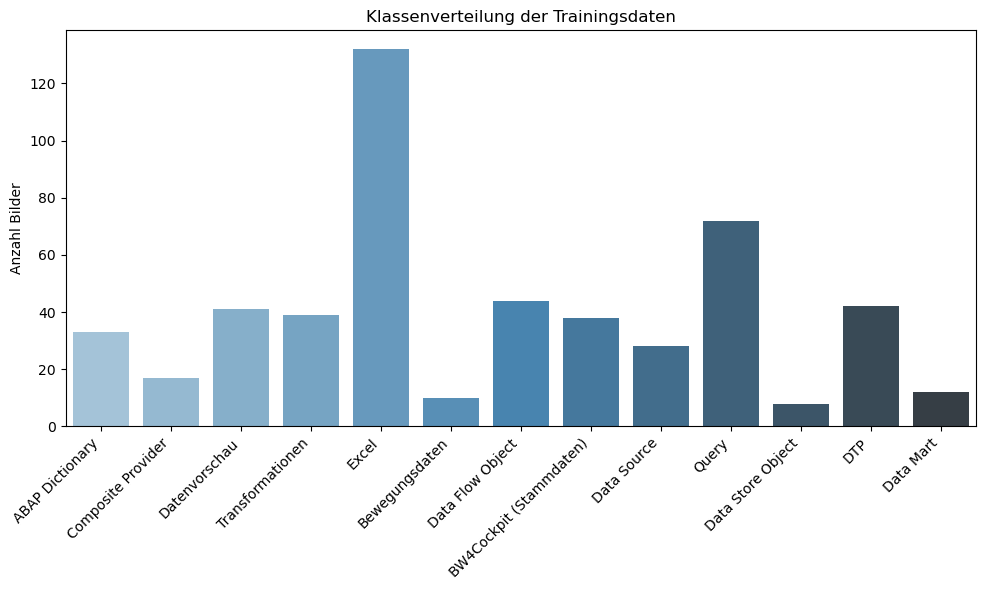


Gefundene Klassen: ['ABAP Dictionary', 'BW4Cockpit (Stammdaten)', 'Bewegungsdaten', 'Composite Provider', 'DTP', 'Data Flow Object', 'Data Mart', 'Data Source', 'Data Store Object', 'Datenvorschau', 'Excel', 'Query', 'Transformationen']

Class Weights: tensor([0.6821, 0.5924, 2.2510, 1.3241, 0.5360, 0.5116, 1.8758, 0.8039, 2.8137,
        0.5490, 0.1705, 0.3126, 0.5772])


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
import torch
import torch.nn as nn

# Klassenverteilung visualisieren
plt.figure(figsize=(10,6))
sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="Blues_d")
plt.xticks(rotation=45, ha="right")
plt.title("Klassenverteilung der Trainingsdaten")
plt.ylabel("Anzahl Bilder")
plt.tight_layout()
plt.show()

# Preprocessing & Augmentation
transform_train = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

transform_val = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

# DataLoader erstellen
train_data = datasets.ImageFolder(data_root, transform=transform_train)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)

print("\nGefundene Klassen:", train_data.classes)

# Class Weights berechnen
class_counts = torch.tensor([counts[k] for k in sorted(counts.keys())], dtype=torch.float)
weights = 1.0 / class_counts
weights = weights / weights.sum() * len(weights)

criterion = nn.CrossEntropyLoss(weight=weights)
print("\nClass Weights:", weights)

Datei nicht gefunden: 0d4a86bcf40e4702a1c3974a050be207.png
Datei nicht gefunden: 4ebd13751ea948219511cac163f383ad.png
Datei nicht gefunden: 5dc98ef9ca164a248950675fc8437e36.png
Datei nicht gefunden: 5f4fc78c83e3484f846a83116be2f6e4.png
Datei nicht gefunden: 00e580ac595043df840cfc31fb279981.png
Datei nicht gefunden: 0ad90690bc5c44adb405f4cd26311c2e.png
Datei nicht gefunden: 0c27ba3d87514a50b9d4c2d7e606e036.png
Datei nicht gefunden: 0de992317b804ae285e53e8c4b4de40c.png
Datei nicht gefunden: 0de992317b804ae285e53e8c4b4de40c.png
Datei nicht gefunden: 6a6ba70c705e4b9b8c401877838bc03e.png
Datei nicht gefunden: 6a58ea17318244c39afef98cd5d5a683.png
Datei nicht gefunden: 6c1ab9ce941b409389c92e8644a50298.png
Datei nicht gefunden: 0a22ca8076ba4418b7784072124cbb1f.png
Datei nicht gefunden: 0c187a38e8d24a4e9f6f92f76e385490.png
Datei nicht gefunden: 0df3c23d943142818a0849709a30b704.png
Datei nicht gefunden: 5cb6e97c32884e0bb9efd0284ee6bda1.png
Datei nicht gefunden: 5f464aac8ecb4670a5c6b73c917b3109.p

/tmp/ipykernel_201/2578125667.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="Blues_d")


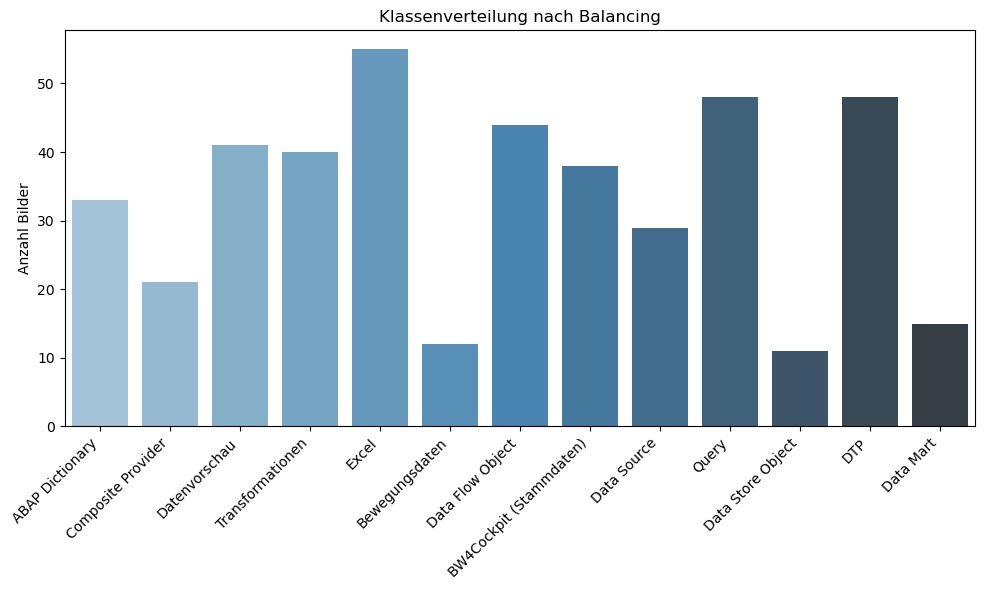

In [3]:
import random, shutil
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Pfade
data_root = Path("/workspace/Projekt/Testdaten/Data/SAP Bilder sortiert")
unlabeled_root = Path("/workspace/Projekt/Testdaten/Data/Ungelabelt")  # Ordner mit ungelabelten Bildern


# -----------------------------
# 2. Überrepräsentierte Klasse reduzieren
# -----------------------------
excel_class = data_root / "Excel"
all_images = list(excel_class.glob("*.png"))
if len(all_images) > 70:
    for img in all_images[70:]:
        img.unlink()
    print("Excel: reduziert auf 70 Bilder")

for cls in ["Excel", "Query"]:
    target_class = data_root / cls
    all_images = list(target_class.glob("*.png"))
    if len(all_images) > 45:
        for img in all_images[45:]:
            img.unlink()
        print(f"{cls}: reduziert auf 45 Bilder")

assignments = {
    "Data Store Object": [
        "0d4a86bcf40e4702a1c3974a050be207.png",
        "4ebd13751ea948219511cac163f383ad.png",
        "5dc98ef9ca164a248950675fc8437e36.png",
        "5f4fc78c83e3484f846a83116be2f6e4.png"
        
       
    ],
    "DTP": [
        "00e580ac595043df840cfc31fb279981.png",
        "0ad90690bc5c44adb405f4cd26311c2e.png",
        "0c27ba3d87514a50b9d4c2d7e606e036.png",
        "0de992317b804ae285e53e8c4b4de40c.png",
        "0de992317b804ae285e53e8c4b4de40c.png",
        "6a6ba70c705e4b9b8c401877838bc03e.png",
        "6a58ea17318244c39afef98cd5d5a683.png",
        "6c1ab9ce941b409389c92e8644a50298.png"
       
    ],
    "Transformationen": [
        "0a22ca8076ba4418b7784072124cbb1f.png",
        "0c187a38e8d24a4e9f6f92f76e385490.png",
        "0df3c23d943142818a0849709a30b704.png",
        "5cb6e97c32884e0bb9efd0284ee6bda1.png",
        "5f464aac8ecb4670a5c6b73c917b3109.png",
        "6a2875c90ab04da6b72f14b74d805863.png",
        "6e59c9f3705345e7b4448330b8d7732f.png"
                              
    ],
    
    "Bewegungsdaten": [
        "5eda11655ea541bcb03f78d8e564817c.png",
        "60714e068cb427284d07bc954ebbc4e.png"
       
    
    ],
    "Composite Provider": [
       "4e7f5e0cc32d4570bbbe631b147a38cc.png",
        "4fc136bf87f540b0bac78695457e6dee.png",
        "5bce067e9c9c4a9087a12a585eedc58e.png",
        "5e84d2fe765c4562b65ee26f5a2ae78e.png",
        "6e72afeb717c4137b77348b7c04d9757.png"
    ]
}



# Verschieben/Kopieren für alle Klassen
for cls, files in assignments.items():
    target_class = data_root / cls
    target_class.mkdir(parents=True, exist_ok=True)
    for fname in files:
        src = unlabeled_root / fname
        dst = target_class / fname
        if src.exists():
            shutil.move(src, dst)   # oder shutil.copy(src, dst)
            print(f"{fname} → {cls}")
        else:
            print(f"Datei nicht gefunden: {fname}")

# -----------------------------
# 3. Neue Klassenverteilung prüfen
# -----------------------------
counts = {cls.name: len(list(cls.glob('*.*'))) for cls in data_root.iterdir() if cls.is_dir()}
print("\nNeue Klassenverteilung:")
for k,v in counts.items():
    print("-", k, ":", v)

# -----------------------------
# 4. Visualisierung der neuen Verteilung
# -----------------------------
plt.figure(figsize=(10,6))
sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="Blues_d")
plt.xticks(rotation=45, ha="right")
plt.title("Klassenverteilung nach Balancing")
plt.ylabel("Anzahl Bilder")
plt.tight_layout()
plt.show()



Beispiele aus Klasse: ABAP Dictionary


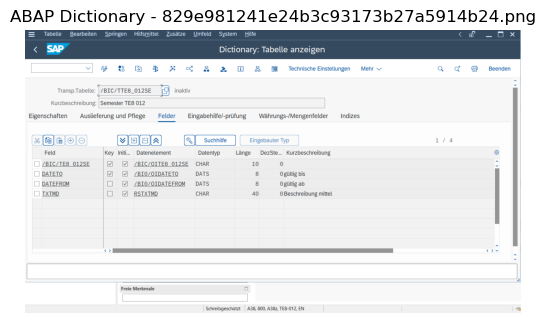


Beispiele aus Klasse: BW4Cockpit (Stammdaten)


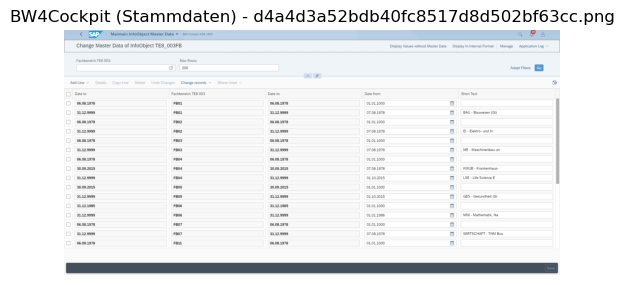


Beispiele aus Klasse: Bewegungsdaten


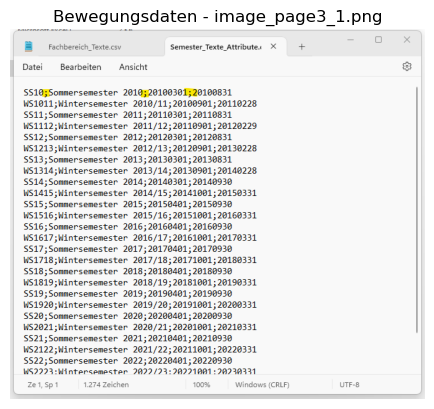


Beispiele aus Klasse: Composite Provider


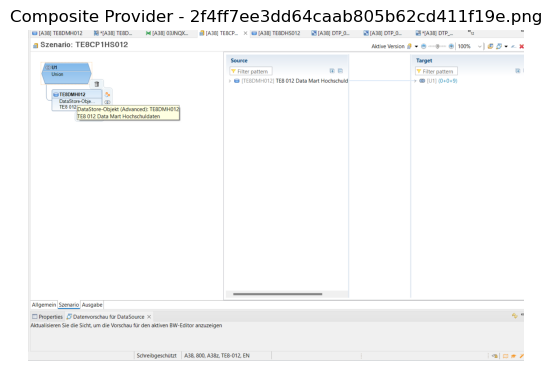


Beispiele aus Klasse: DTP


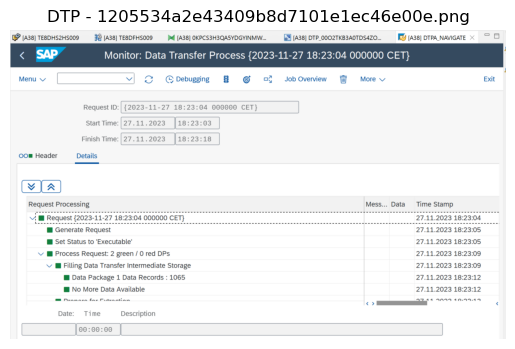


Beispiele aus Klasse: Data Flow Object


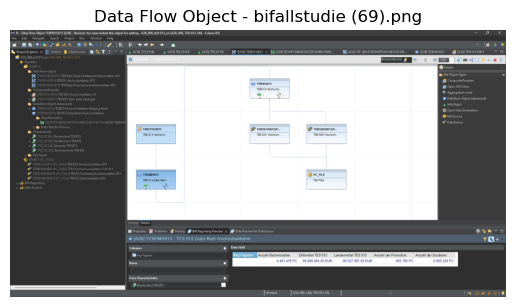


Beispiele aus Klasse: Data Mart


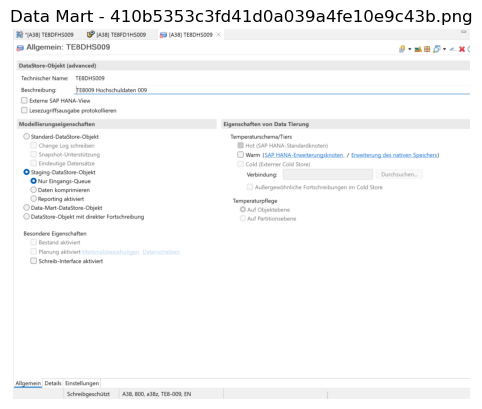


Beispiele aus Klasse: Data Source


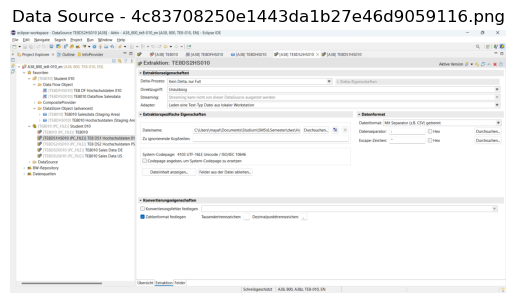


Beispiele aus Klasse: Data Store Object


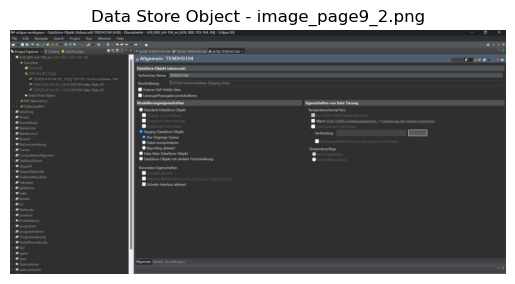


Beispiele aus Klasse: Datenvorschau


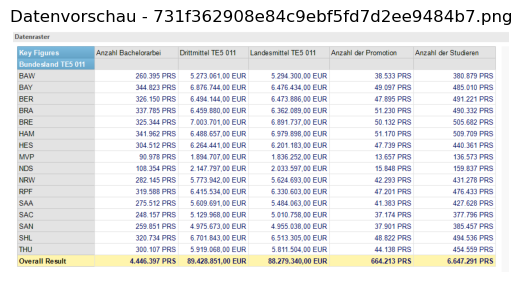


Beispiele aus Klasse: Excel


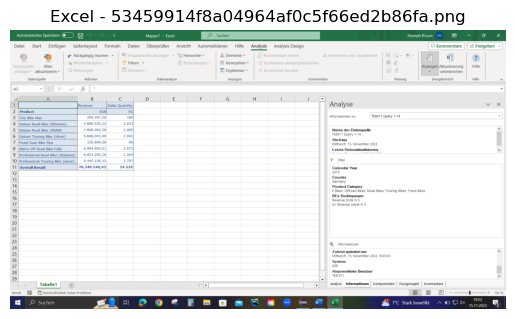


Beispiele aus Klasse: Query


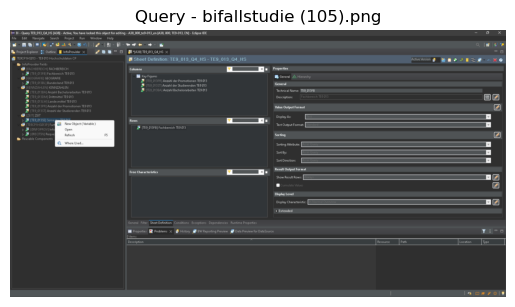


Beispiele aus Klasse: Transformationen


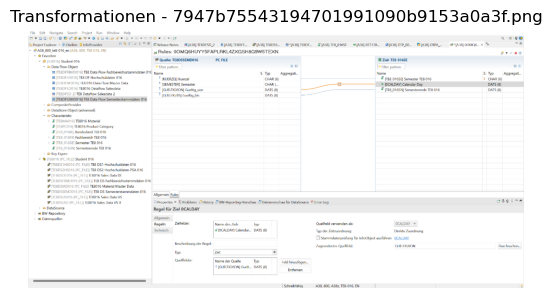

In [20]:
import matplotlib.pyplot as plt
from PIL import Image
import random

# Beispielbilder aus jeder Klasse anzeigen
for cls in train_data.classes:
    example_folder = data_root / cls
    sample_images = list(example_folder.glob("*.png")) + list(example_folder.glob("*.jpg"))
    
    if sample_images:  # nur wenn Bilder vorhanden sind
        print(f"\nBeispiele aus Klasse: {cls}")
        for path in random.sample(sample_images, min(1, len(sample_images))):  # max. 1 Bilder
            img = Image.open(path)
            plt.imshow(img)
            plt.axis("off")
            plt.title(f"{cls} - {path.name}")
            plt.show()